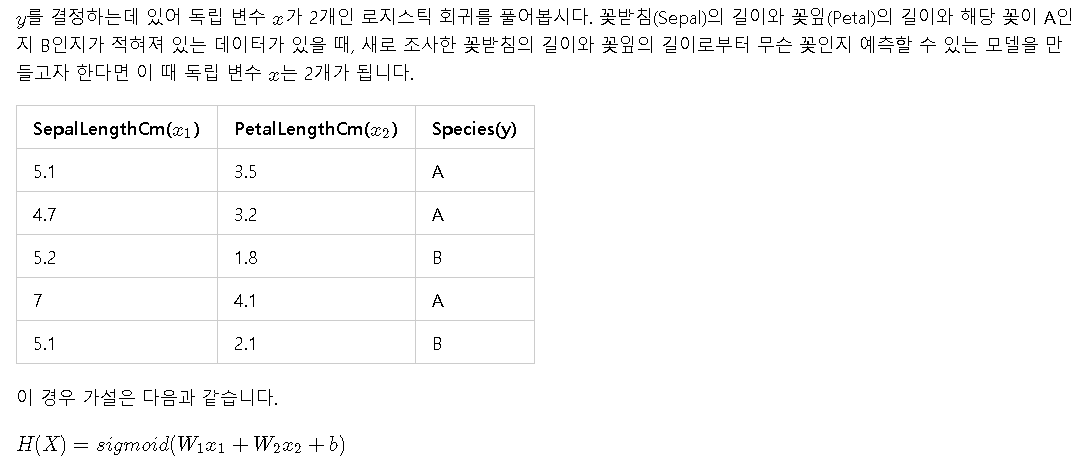

이제 독립 변수가 2개인 좀 더 간단한 예를 들고, 이를 케라스로 구현해봅시다. OR 게이트는 0 또는 1의 값을 입력으로 받는데, 두 개의 입력 x1, x2 중 하나라도 1이면 출력값 y가 1이 되고 두 개의 입력이 0인 경우에만 출력값이 0이 되는 게이트입니다. 로지스틱 회귀를 통해 OR 게이트를 구현해봅시다.

In [0]:
import numpy as np
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
y=np.array([0, 1, 1, 1])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [2]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# sgs는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4 samples
Epoch 1/800
4/4 [==============================] - 1s 204ms/sample - loss: 0.5707 - binary_accuracy: 1.0000
Epoch 2/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5663 - binary_accuracy: 0.7500
Epoch 3/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5620 - binary_accuracy: 0.7500
Epoch 4/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5579 - binary_accuracy: 0.7500
Epoch 5/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5538 - binary_accuracy: 0.7500
Epoch 6/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5498 - binary_accuracy: 0.7500
Epoch 7/800
4/4 [==============================] - 0s 2ms/sample - loss: 0.5460 - binary_accuracy: 0.7500
Epoch 8/800
4/4 [==============================] - 0s 2ms/samp

앞서 실습한 로지스틱 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 2로 바뀌면서, **input_dim의 인자값이 2로 바뀌었**다는 점입니다. 이는 입력 벡터의 차원이 2임을 의미합니다.

정확도는 100%가 나오고 있으므로 800회 정도로 학습을 멈추고 시그모이드 함수의 각 입력값에 대해서 출력값이 0.5보다 크고 작은지를 확인해보겠습니다.

In [3]:
print(model.predict(X))

[[0.38916045]
 [0.8546146 ]
 [0.87271523]
 [0.9844387 ]]


입력이 둘 다 0, 0인 경우를 제외하고 나머지 3개의 입력 쌍(pair)에 대해서는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.